Sumber Data : https://www.bps.go.id/indicator/55/61/5/produksi-tanaman-sayuran.html

data yang diambil data produksi cabai rawit
data tahun 2018-2022

Nama Kelompok :
- Felix Angdinata - 00000068247
- Rafles Kristiyanto - 00000032818
- David Erik Junanta - 00000032719

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [2]:
import pandas as pd

Import Dataset

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Data Analysis/Week12/bps-file.xlsx")

Data Preparation

In [4]:
df.head()

,Provinsi,2022,2021,2020,2019,2018
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,ACEH,65308.0,51686.0,64782.0,61887.0,62168
3,SUMATERA UTARA,87012.0,78663.0,61160.0,49246.0,39825
4,SUMATERA BARAT,26656.0,35118.0,33356.0,31782.0,25178


In [5]:
df = df.drop([0, 1]) # Drop baris index 0 dan 1

In [6]:
df.head()

,Provinsi,2022,2021,2020,2019,2018
2,ACEH,65308.0,51686.0,64782.0,61887.0,62168
3,SUMATERA UTARA,87012.0,78663.0,61160.0,49246.0,39825
4,SUMATERA BARAT,26656.0,35118.0,33356.0,31782.0,25178
5,RIAU,7429.0,6694.0,8627.0,8120.0,12691
6,JAMBI,12429.0,11526.0,13588.0,9880.0,8273


In [7]:
df.columns

Index([' Provinsi', 2022, 2021, 2020, 2019, 2018], dtype='object')

In [8]:
df.columns = ['tahun_' + str(col) if isinstance(col, int) else col for col in df.columns] # Rename column tahun

In [9]:
# Ganti Type Data menjadi int / float
df['tahun_2022'] = df['tahun_2022'].astype(int)
df['tahun_2021'] = df['tahun_2021'].astype(int)
df['tahun_2020'] = df['tahun_2020'].astype(int)
df['tahun_2019'] = df['tahun_2019'].astype(int)
df['tahun_2018'] = pd.to_numeric(df['tahun_2018'], errors='coerce').fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 2 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    Provinsi   34 non-null     object 
 1   tahun_2022  34 non-null     int64  
 2   tahun_2021  34 non-null     int64  
 3   tahun_2020  34 non-null     int64  
 4   tahun_2019  34 non-null     int64  
 5   tahun_2018  34 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ KB


In [11]:
df.head()

,Provinsi,tahun_2022,tahun_2021,tahun_2020,tahun_2019,tahun_2018
2,ACEH,65308,51686,64782,61887,62168.0
3,SUMATERA UTARA,87012,78663,61160,49246,39825.0
4,SUMATERA BARAT,26656,35118,33356,31782,25178.0
5,RIAU,7429,6694,8627,8120,12691.0
6,JAMBI,12429,11526,13588,9880,8273.0


In [12]:
df = df.applymap(lambda x: '{:.0f}'.format(x) if isinstance(x, (int, float)) else x) # Menghilangkan float dibelakang pada tahun 2018

In [13]:
df.head()

,Provinsi,tahun_2022,tahun_2021,tahun_2020,tahun_2019,tahun_2018
2,ACEH,65308,51686,64782,61887,62168
3,SUMATERA UTARA,87012,78663,61160,49246,39825
4,SUMATERA BARAT,26656,35118,33356,31782,25178
5,RIAU,7429,6694,8627,8120,12691
6,JAMBI,12429,11526,13588,9880,8273


In [14]:
df.columns

Index([' Provinsi', 'tahun_2022', 'tahun_2021', 'tahun_2020', 'tahun_2019',
       'tahun_2018'],
      dtype='object')

In [15]:
# sedikit tambahan klarena yg tadi datanya 0  jadi NaN pada tahun 2018
# jadi mengisi kembali jadi 0
df['tahun_2022'] = pd.to_numeric(df['tahun_2022'], errors='coerce')
df['tahun_2021'] = pd.to_numeric(df['tahun_2021'], errors='coerce')
df['tahun_2020'] = pd.to_numeric(df['tahun_2020'], errors='coerce')
df['tahun_2019'] = pd.to_numeric(df['tahun_2019'], errors='coerce')
df['tahun_2018'] = pd.to_numeric(df['tahun_2018'], errors='coerce').fillna(0)

In [16]:
df.info

<bound method DataFrame.info of                 Provinsi  tahun_2022  tahun_2021  tahun_2020  tahun_2019  \
2                   ACEH       65308       51686       64782       61887   
3         SUMATERA UTARA       87012       78663       61160       49246   
4         SUMATERA BARAT       26656       35118       33356       31782   
5                   RIAU        7429        6694        8627        8120   
6                  JAMBI       12429       11526       13588        9880   
7       SUMATERA SELATAN        9461       11562       11645       11014   
8               BENGKULU       21427       16278       11476       11118   
9                LAMPUNG       11193       10921       10558       12796   
10  KEP. BANGKA BELITUNG        3710        3954        3386        2002   
11             KEP. RIAU        1773        1627        2230        2339   
12           DKI JAKARTA           0           1           0           0   
13            JAWA BARAT      149053      137456      13

Modeling


In [17]:
X = df
y = df[' Provinsi']

In [18]:
# Membuat label pada profile provinsi
# Menjadi 34 label karena terdiri dari 34 provinsi
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[' Provinsi'] = le.fit_transform(X[' Provinsi'])
y = le.transform(y)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 2 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0    Provinsi   34 non-null     int64
 1   tahun_2022  34 non-null     int64
 2   tahun_2021  34 non-null     int64
 3   tahun_2020  34 non-null     int64
 4   tahun_2019  34 non-null     int64
 5   tahun_2018  34 non-null     int64
dtypes: int64(6)
memory usage: 1.7 KB


In [20]:
X

,Provinsi,tahun_2022,tahun_2021,tahun_2020,tahun_2019,tahun_2018
2,0,65308,51686,64782,61887,62168
3,33,87012,78663,61160,49246,39825
4,31,26656,35118,33356,31782,25178
5,25,7429,6694,8627,8120,12691
6,7,12429,11526,13588,9880,8273
7,32,9461,11562,11645,11014,13449
8,3,21427,16278,11476,11118,11353
9,18,11193,10921,10558,12796,14649
10,16,3710,3954,3386,2002,2036
11,17,1773,1627,2230,2339,1716


In [21]:
cols = X.columns

In [22]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,Provinsi,tahun_2022,tahun_2021,tahun_2020,tahun_2019,tahun_2018
0,0.000000,0.100980,0.089284,0.094580,0.115440,0.137134
1,1.000000,0.134539,0.135886,0.089292,0.091860,0.087848
2,0.939394,0.041216,0.060663,0.048699,0.059284,0.055539
3,0.757576,0.011487,0.011562,0.012595,0.015146,0.027995
4,0.212121,0.019218,0.019909,0.019838,0.018429,0.018249


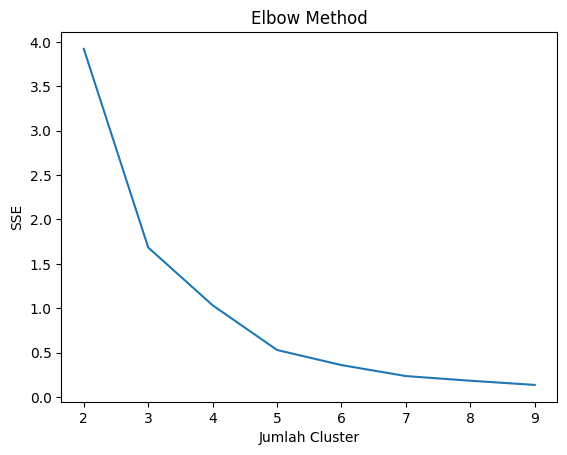

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

cs = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)


plt.plot(range(2, 10), cs)
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("SSE")
plt.show()


dilihat dari elbow method kurva ini menunjukkan cluster yang mungkin optimal sebanyak 3 cluster saja. jadi setelah itu dilakukan filter data menjadi 3 cluster

In [24]:
df_x = df.iloc[:, 1:6]
df_x.head()

,tahun_2022,tahun_2021,tahun_2020,tahun_2019,tahun_2018
2,65308,51686,64782,61887,62168
3,87012,78663,61160,49246,39825
4,26656,35118,33356,31782,25178
5,7429,6694,8627,8120,12691
6,12429,11526,13588,9880,8273


In [25]:
# Mengkonversi ke array
import numpy as np
x_array = np.array(df_x)
print(x_array)

[[ 65308  51686  64782  61887  62168]
 [ 87012  78663  61160  49246  39825]
 [ 26656  35118  33356  31782  25178]
 [  7429   6694   8627   8120  12691]
 [ 12429  11526  13588   9880   8273]
 [  9461  11562  11645  11014  13449]
 [ 21427  16278  11476  11118  11353]
 [ 11193  10921  10558  12796  14649]
 [  3710   3954   3386   2002   2036]
 [  1773   1627   2230   2339   1716]
 [     0      1      0      0      0]
 [149053 137456 130838 128494 131417]
 [242303 179287 159099 148750 141771]
 [ 15198  15933  15052  10040  10147]
 [646740 578883 684943 536098 453338]
 [  3910   3993   5861   5019   5225]
 [ 28318  29175  35331  28656  31655]
 [ 50078  62539  98941 164773 210530]
 [ 19881   9076  10468   8816   5248]
 [  6193   6332   6133   5731   4166]
 [  5419   6961   6124   5864   3639]
 [ 11764  11758  15616  13768  12672]
 [  7778   8367   9081   8029   6797]
 [  5875   5819   3330   3821   3298]
 [ 19006  17371  22414  14760  16470]
 [ 25389  22199  25042  22632  26091]
 [ 23761  26

In [26]:
# Normalisasi data lagi pada x_array tadi sehjingga aakan m,erubah data memioliki rentang nilai 0 - 1
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.1009803 , 0.08928417, 0.09458013, 0.11543971, 0.13713388],
       [0.13453938, 0.13588607, 0.0892921 , 0.09186007, 0.08784836],
       [0.04121594, 0.06066349, 0.04869894, 0.05928394, 0.05553913],
       [0.01148684, 0.01156194, 0.01259521, 0.01514648, 0.02799456],
       [0.01921792, 0.01990907, 0.01983815, 0.01842947, 0.01824908],
       [0.01462875, 0.01997125, 0.01700141, 0.02054475, 0.02966661],
       [0.03313078, 0.02811799, 0.01675468, 0.02073875, 0.02504312],
       [0.0173068 , 0.01886395, 0.01541442, 0.02386877, 0.03231364],
       [0.00573646, 0.00682868, 0.00494348, 0.00373439, 0.00449113],
       [0.00274144, 0.00280886, 0.00325575, 0.00436301, 0.00378526],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.23046819, 0.23744908, 0.19102027, 0.23968379, 0.28988746],
       [0.37465287, 0.30971079, 0.23228064, 0.27746793, 0.31272693],
       [0.0234994 , 0.02752202, 0.02197555, 0.01872792, 0.02238286],
       [1.        , 1.        , 1.

In [27]:
# Modeling KMeans dengan 3 cluster
kmeans = KMeans(n_clusters = 3, random_state=10)
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [28]:
print(kmeans.cluster_centers_)

[[0.0235163  0.02465978 0.0211493  0.02462871 0.02930499]
 [1.         1.         1.         1.         1.        ]
 [0.2275175  0.21839742 0.18925078 0.27483594 0.35567134]]


In [29]:
# Mmebuat kolom label baru
df["Cluster"] = kmeans.labels_
df

,Provinsi,tahun_2022,tahun_2021,tahun_2020,tahun_2019,tahun_2018,Cluster
2,0,65308,51686,64782,61887,62168,0
3,33,87012,78663,61160,49246,39825,0
4,31,26656,35118,33356,31782,25178,0
5,25,7429,6694,8627,8120,12691,0
6,7,12429,11526,13588,9880,8273,0
7,32,9461,11562,11645,11014,13449,0
8,3,21427,16278,11476,11118,11353,0
9,18,11193,10921,10558,12796,14649,0
10,16,3710,3954,3386,2002,2036,0
11,17,1773,1627,2230,2339,1716,0


dari data diatas cluster = 2 didapatkan oleh provinsi dengan code label 8,9,21

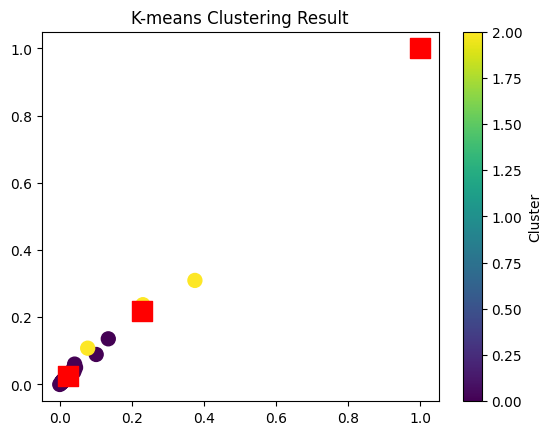

In [30]:
output = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=100, c=df['Cluster'], marker="o", alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker='s')

plt.title("K-means Clustering Result")
plt.colorbar(output, label='Cluster')

terlihat 3 kotak merah yang berarti 3 titik centroid cluster